COMP40020: Human Language Technologies
Assignment 1


#### imports

In [25]:
import nltk
import matplotlib
import re

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import praw
from praw.models import MoreComments
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA


In [17]:
# pip install praw

In [18]:
ci = "HLTassignment1999" #your client id
cs = "p2LFKOI2h6gyQ_Y3A9ilM-hprJGMiA" #your client secret
ua = "busterorwha" #your user agent name
sub = "ireland" #the name of the subreddit (not including the 'r/')

In [23]:
# reddit = praw.Reddit(
#     client_id=ci,
#     client_secret=cs,
#     user_agent=ua
# )
reddit = praw.Reddit(client_id='fQeiW15Vp7PWost_U0QkaA',
                     client_secret='p2LFKOI2h6gyQ_Y3A9ilM-hprJGMiA',
                     user_agent='busterorwha')
# with open(sub+".txt", "w") as f:
    
#     #on the following line you can change top to any of the previously mentioned ways of sorting 
#     #and the limit to however many posts you would like to extract (here we extract just 10).
#     for post in reddit.subreddit(sub).top(limit=10): 
        
#         #this line collects the post titles
#         f.write(post.title+"\n")
        
#         #this line collects the post content
#         f.write(post.selftext+"\n")
        
#         #this section collects the comments
#         for comment in post.comments:
#             if isinstance(comment, MoreComments):
#                 continue
#             f.write(comment.body+"\n")

headlines = set()


In [24]:
for submission in reddit.subreddit('ireland').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

966


In [26]:
sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': 'Today is Ireland Reads Day. What are you reading currently? What are your favourite '
              'books?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.6705,
  'headline': 'The 14k landlord tax credit if given only to those with < 14k profit',
  'neg': 0.0,
  'neu': 0.667,
  'pos': 0.333},
 {'compound': 0.0,
  'headline': 'What comment got you downvoted the most on r/ireland?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [27]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.0,1.000,0.000,0.0000,Today is Ireland Reads Day. What are you readi...
1,0.0,0.667,0.333,0.6705,The 14k landlord tax credit if given only to t...
2,0.0,1.000,0.000,0.0000,What comment got you downvoted the most on r/i...
3,0.0,1.000,0.000,0.0000,TV license employee from an Post?
4,0.0,0.605,0.395,0.5040,Whats a good deposit for a house ? 20 k ?


In [28]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.0,1.000,0.000,0.0000,Today is Ireland Reads Day. What are you readi...,0
1,0.0,0.667,0.333,0.6705,The 14k landlord tax credit if given only to t...,1
2,0.0,1.000,0.000,0.0000,What comment got you downvoted the most on r/i...,0
3,0.0,1.000,0.000,0.0000,TV license employee from an Post?,0
4,0.0,0.605,0.395,0.5040,Whats a good deposit for a house ? 20 k ?,1


In [29]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['The 14k landlord tax credit if given only to those with < 14k profit',
 'Whats a good deposit for a house ? 20 k ?',
 'Dry Cleaners Safety Pins',
 'Seen this in Dublin 1 earlier and it gave me a laugh.',
 'How to fond out if a property has been vacant?']

Negative headlines:

['Cut the grass today. I’ve never given it the first cut in February (and I’m not one of these people who are deeply into lawn care). First for me, maybe I’m the first in the country?',
 'Baby died after ‘traumatic’ delivery into toilet at Rotunda, inquest hears',
 'One month jail for woman who filmed couple next door and put faeces in bicycle basket during ten-year campaign of abuse',
 'Recommendations for lesser-known savage Irish bands? (Acoustic/folk preferably)',
 'Jury finds against solicitor who claimed false imprisonment on cruise ship after suicide comment – The Irish Times']


In [30]:
print(df.label.value_counts())
print(df.label.value_counts(normalize=True) * 100)


 0    524
 1    236
-1    206
Name: label, dtype: int64
 0    54.244306
 1    24.430642
-1    21.325052
Name: label, dtype: float64


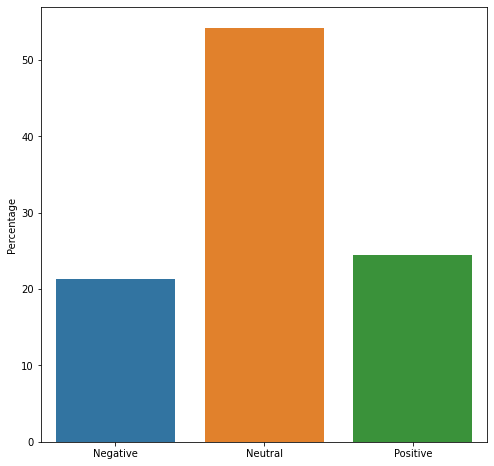

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()